In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('myphoto.jpg', 1)

In [3]:
img

array([[[231, 207, 217],
        [228, 204, 214],
        [230, 206, 216],
        ...,
        [225, 201, 213],
        [225, 201, 213],
        [226, 202, 214]],

       [[230, 206, 216],
        [230, 206, 216],
        [231, 207, 217],
        ...,
        [225, 201, 213],
        [226, 202, 214],
        [226, 202, 214]],

       [[230, 205, 215],
        [231, 206, 216],
        [232, 207, 217],
        ...,
        [226, 202, 214],
        [226, 202, 214],
        [225, 201, 213]],

       ...,

       [[150, 133, 142],
        [157, 140, 151],
        [153, 136, 147],
        ...,
        [150, 134, 145],
        [156, 140, 151],
        [142, 128, 139]],

       [[159, 142, 151],
        [146, 129, 140],
        [148, 131, 142],
        ...,
        [147, 131, 142],
        [144, 128, 139],
        [143, 129, 140]],

       [[153, 136, 147],
        [154, 137, 148],
        [151, 134, 145],
        ...,
        [149, 133, 144],
        [143, 126, 139],
        [135, 121, 133]]

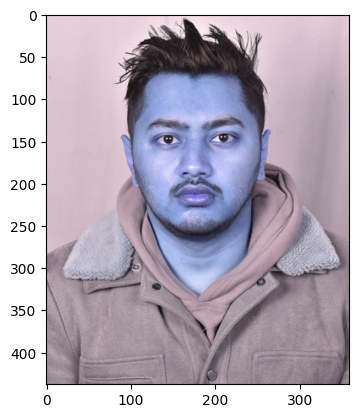

In [4]:
plt.imshow(img)

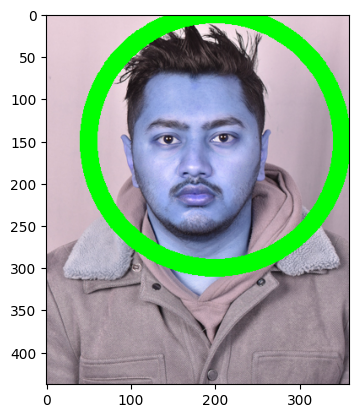

In [5]:
circle = cv2.circle(img, (200,150), 150, (0,255,0), 20)
plt.imshow(circle)

In [6]:
b,g,r = cv2.split(img)

In [17]:
img2 = cv2.merge((r,g,b))

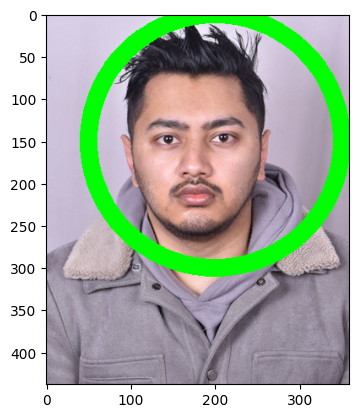

In [18]:
plt.imshow(img2)

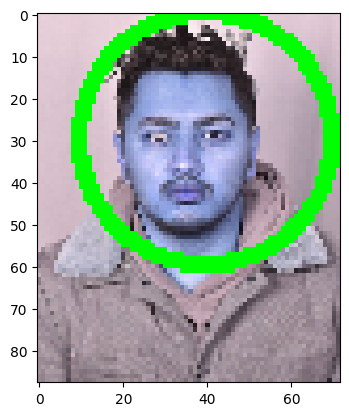

In [26]:
resized_img = cv2.resize(img,dsize=None, fx=0.2, fy=0.2 )
plt.imshow(resized_img)

In [8]:
myimg = cv2.imread('myphoto.jpg', 1)
height, width, channels = myimg.shape
b,g,r = cv2.split(myimg)

rgb_split = np.empty([height, width*3, 3], 'uint8')
rgb_split[:, 0:width] = cv2.merge([b,b,b])
rgb_split[:, width:width*2] = cv2.merge([g,g,g])
rgb_split[:, width*2:width*3] = cv2.merge([r,r,r])
cv2.imshow('Channel', rgb_split)

In [11]:
cv2.imshow(rgb_split)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


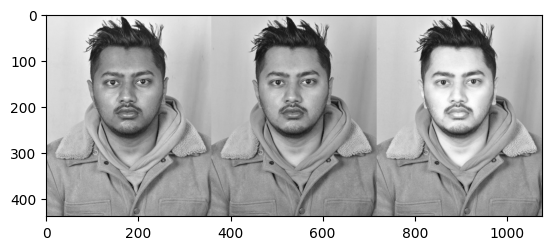

In [12]:
plt.imshow(rgb_split)

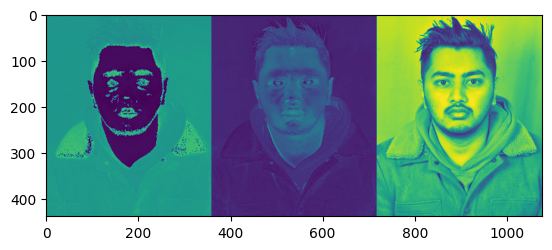

In [14]:
hsv = cv2.cvtColor(myimg, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v), axis=1)
plt.imshow(hsv_split)

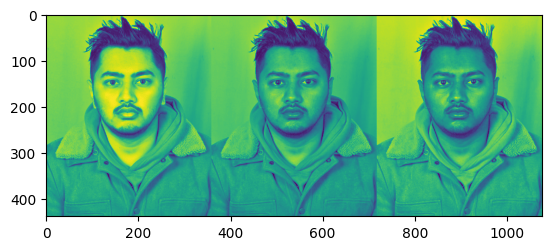

In [15]:
rgb = cv2.cvtColor(myimg, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(rgb)
rgb_split = np.concatenate((r,g,b), axis=1)
plt.imshow(rgb_split)

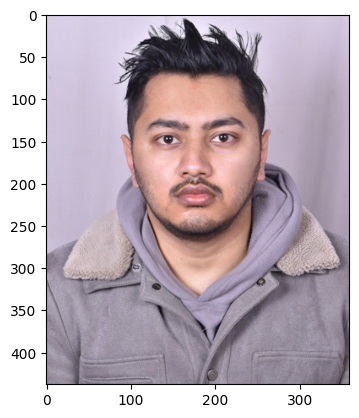

In [16]:
plt.imshow(rgb)

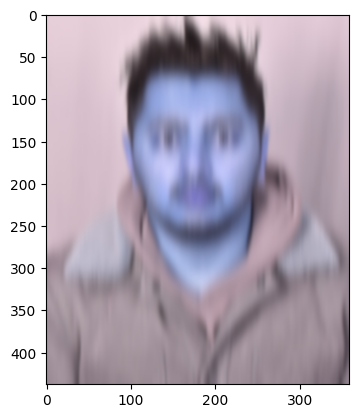

In [5]:
blur = cv2.GaussianBlur(img, (5,55), 0)
plt.imshow(blur)

In [7]:
kernel = np.ones((5,5), 'uint8')
dilate = cv2.dilate(img, kernel, iterations=1)
erode = cv2.erode(img, kernel, iterations=1)

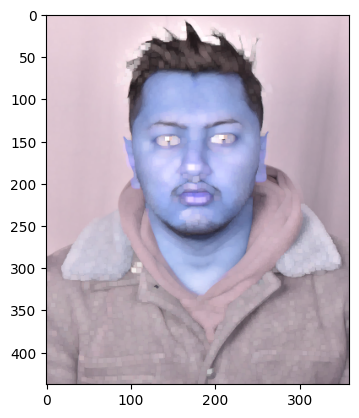

In [10]:
plt.imshow(dilate)

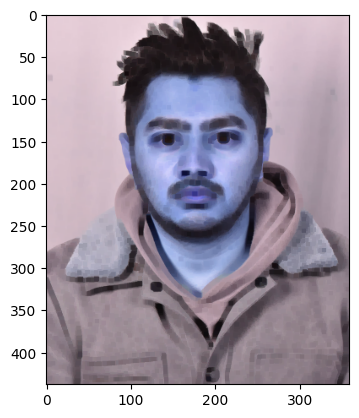

In [11]:
plt.imshow(erode)

In [12]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    
    frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
    cv2.imshow('Frame', frame)
    
    ch= cv2.waitKey(1)
    if ch & 0xFF == ord('q'):
        break
        
cap.release(
cv2.destroyAllWindows())

SystemError: <method 'release' of 'cv2.VideoCapture' objects> returned NULL without setting an error

## Identify the objects from the image, display objects which pixel value is >= 1000

2054
4
4926.0 298.2253956794739
29882.0 795.3868639469147
1038.0 645.0681030750275
17250.0 585.0782079696655


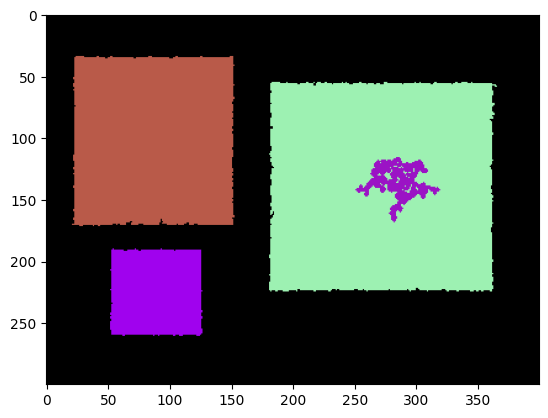

In [15]:
import random
img = cv2.imread("fuzzy.png",1)
cv2.imshow("Original",img)

#Convert image to grayscale and use Gaussian blur, setting kernel size 3X3
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3),0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 205, 1)
plt.imshow(thresh)

#Find objects from the image using Gaussian threshold
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

#Group objects based on the area of the objects or contours
filtered = []
for c in contours:
    if cv2.contourArea(c) < 1000:continue
    filtered.append(c)

print(len(filtered))

#Create azero matrix equal to the size of size image
objects = np.zeros([img.shape[0],img.shape[1],3], 'uint8')
for c in filtered:
    col = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    cv2.drawContours(objects,[c], -1, col, -1)
    area = cv2.contourArea(c)
    p = cv2.arcLength(c,True)
    print(area,p)

plt.imshow(objects)

cv2.waitKey(0)
cv2.destroyAllWindows()